In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [48]:
import pandas as pd
import numpy as np
import re

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

path = "/content/drive/MyDrive/Freelance/Data Science/Escherichia-coli-and-Total-Coliforms-in-the-Different-Natural-Spring-Water-in-Medina/Escherichia-coli-and-Total-Coliforms-in-the-Different-Natural-Spring-Water-in-Medina.csv"
path2 = "/content/drive/MyDrive/Freelance/Data Science/Escherichia-coli-and-Total-Coliforms-in-the-Different-Natural-Spring-Water-in-Medina/Escherichia-coli-and-Total-Coliforms-in-the-Different-Natural-Spring-Water-in-Medina2.csv"
data = pd.read_csv(path)
data2 = pd.read_csv(path2)

#Dataset is now stored in a Pandas Dataframe
data
# data.columns

,Spring,Sample,D1_ecoli,D1_coliforms,D1_visitors,D1_weather,D1_waterTemp,D1_rain,D2_ecoli,D2_coliforms,...,D3_coliforms,D3_visitors,D3_weather,D3_waterTemp,D3_rain,total_ecoli,total_coliforms,total_visitors,average_waterTemp,total_rain
0,Spring1,A,0,58,0,1,27,1,0,118,...,35,0,2,28,0,0,575,0,27.67,2
1,Spring1,B,0,56,0,1,27,1,0,92,...,30,0,2,28,0,0,575,0,27.67,2
2,Spring1,C,0,62,0,1,27,1,0,87,...,37,0,2,28,0,0,575,0,27.67,2
3,Spring2,A,2,68,5,3,28,0,1,60,...,21,0,2,29,0,7,383,6,28.67,1
4,Spring2,B,1,50,5,3,28,0,0,49,...,14,0,2,29,0,7,383,6,28.67,1
5,Spring2,C,1,53,5,3,28,0,1,40,...,28,0,2,29,0,7,383,6,28.67,1
6,Spring3,A,1,11,32,3,20,0,1,9,...,1,10,2,20,0,3,40,113,20.00,1
7,Spring3,B,0,5,32,3,20,0,0,5,...,1,10,2,20,0,3,40,113,20.00,1
8,Spring3,C,0,1,32,3,20,0,0,4,...,3,10,2,20,0,3,40,113,20.00,1
9,Spring4,A,2,34,13,3,27,0,5,65,...,49,2,2,28,0,27,411,17,27.67,1


In [49]:
data2

,Spring,D1_ecoli,D1_coliforms,D1_visitors,D1_weather,D1_waterTemp,D1_rain,D2_ecoli,D2_coliforms,D2_visitors,...,D3_coliforms,D3_visitors,D3_weather,D3_waterTemp,D3_rain,total_ecoli,total_coliforms,total_visitors,average_waterTemp,total_rain
0,Spring1,0,59,0,1,27,1,0,99,0,...,34,0,2,28,0,0,575,0,27.67,2
1,Spring2,2,57,5,3,28,0,1,50,1,...,21,0,2,29,0,7,383,6,28.67,1
2,Spring3,1,6,32,3,20,0,1,6,71,...,2,10,2,20,0,3,40,113,20.00,1
3,Spring4,2,39,13,3,27,0,5,64,2,...,35,2,2,28,0,27,411,17,27.67,1
4,Spring5,0,0,3,3,22,0,0,0,1,...,1,1,2,20,0,0,1,5,20.67,1




##**Reorganizing Data into groups**




In [50]:
# By day
dayta_1 = data[['Spring', 'Sample', 'D1_ecoli', 'D1_coliforms', 'D1_visitors', 'D1_weather', 'D1_rain']]
dayta_2 = data[['Spring', 'Sample', 'D2_ecoli', 'D2_coliforms', 'D2_visitors', 'D2_weather', 'D2_rain']]
dayta_3 = data[['Spring', 'Sample', 'D3_ecoli', 'D3_coliforms', 'D3_visitors', 'D3_weather', 'D3_rain']]
dayta_1

,Spring,Sample,D1_ecoli,D1_coliforms,D1_visitors,D1_weather,D1_rain
0,Spring1,A,0,58,0,1,1
1,Spring1,B,0,56,0,1,1
2,Spring1,C,0,62,0,1,1
3,Spring2,A,2,68,5,3,0
4,Spring2,B,1,50,5,3,0
5,Spring2,C,1,53,5,3,0
6,Spring3,A,1,11,32,3,0
7,Spring3,B,0,5,32,3,0
8,Spring3,C,0,1,32,3,0
9,Spring4,A,2,34,13,3,0


In [51]:
# By Spring
df_spring1 = data.loc[data['Spring'] == 'Spring1']
df_spring2 = data.loc[data['Spring'] == 'Spring2']
df_spring3 = data.loc[data['Spring'] == 'Spring3']
df_spring4 = data.loc[data['Spring'] == 'Spring4']
df_spring5 = data.loc[data['Spring'] == 'Spring5']
df_spring1

,Spring,Sample,D1_ecoli,D1_coliforms,D1_visitors,D1_weather,D1_waterTemp,D1_rain,D2_ecoli,D2_coliforms,...,D3_coliforms,D3_visitors,D3_weather,D3_waterTemp,D3_rain,total_ecoli,total_coliforms,total_visitors,average_waterTemp,total_rain
0,Spring1,A,0,58,0,1,27,1,0,118,...,35,0,2,28,0,0,575,0,27.67,2
1,Spring1,B,0,56,0,1,27,1,0,92,...,30,0,2,28,0,0,575,0,27.67,2
2,Spring1,C,0,62,0,1,27,1,0,87,...,37,0,2,28,0,0,575,0,27.67,2


In [52]:
data.shape

(15, 25)

In [53]:
data2.shape

(5, 24)

In [54]:
pd.set_option('precision', 2) 
print(data.describe())

       D1_ecoli  D1_coliforms  D1_visitors  D1_weather  D1_waterTemp  D1_rain  \
count     15.00         15.00        15.00       15.00          15.0    15.00   
mean       0.73         32.07        10.60        2.60          24.8     0.20   
std        0.96         26.30        11.94        0.83           3.3     0.41   
min        0.00          0.00         0.00        1.00          20.0     0.00   
25%        0.00          3.00         3.00        3.00          22.0     0.00   
50%        0.00         35.00         5.00        3.00          27.0     0.00   
75%        1.00         54.50        13.00        3.00          27.0     0.00   
max        3.00         68.00        32.00        3.00          28.0     1.00   

       D2_ecoli  D2_coliforms  D2_visitors  D2_weather  ...  D3_coliforms  \
count      15.0         15.00        15.00        15.0  ...         15.00   
mean        1.4         43.60        15.00         2.0  ...         18.33   
std         2.5         38.92        28

In [55]:
data2.describe

<bound method NDFrame.describe of     Spring  D1_ecoli  D1_coliforms  D1_visitors  D1_weather  D1_waterTemp  \
0  Spring1         0            59            0           1            27   
1  Spring2         2            57            5           3            28   
2  Spring3         1             6           32           3            20   
3  Spring4         2            39           13           3            27   
4  Spring5         0             0            3           3            22   

   D1_rain  D2_ecoli  D2_coliforms  D2_visitors  ...  D3_coliforms  \
0        1         0            99            0  ...            34   
1        0         1            50            1  ...            21   
2        0         1             6           71  ...             2   
3        0         5            64            2  ...            35   
4        0         0             0            1  ...             1   

   D3_visitors  D3_weather  D3_waterTemp  D3_rain  total_ecoli  \
0            0  

In [56]:
data.columns

Index(['Spring', 'Sample', 'D1_ecoli', 'D1_coliforms', 'D1_visitors',
       'D1_weather', 'D1_waterTemp', 'D1_rain', 'D2_ecoli', 'D2_coliforms',
       'D2_visitors', 'D2_weather', 'D2_waterTemp', 'D2_rain', 'D3_ecoli',
       'D3_coliforms', 'D3_visitors', 'D3_weather', 'D3_waterTemp', 'D3_rain',
       'total_ecoli', 'total_coliforms', 'total_visitors', 'average_waterTemp',
       'total_rain'],
      dtype='object')

In [57]:
data2.columns

Index(['Spring', 'D1_ecoli', 'D1_coliforms', 'D1_visitors', 'D1_weather',
       'D1_waterTemp', 'D1_rain', 'D2_ecoli', 'D2_coliforms', 'D2_visitors',
       'D2_weather', 'D2_waterTemp', 'D2_rain', 'D3_ecoli', 'D3_coliforms',
       'D3_visitors', 'D3_weather', 'D3_waterTemp', 'D3_rain', 'total_ecoli',
       'total_coliforms', 'total_visitors', 'average_waterTemp', 'total_rain'],
      dtype='object')



##**Data Visualization for E-Coli**




In [71]:
from matplotlib import rc

In [89]:
rc('text', usetex=False)

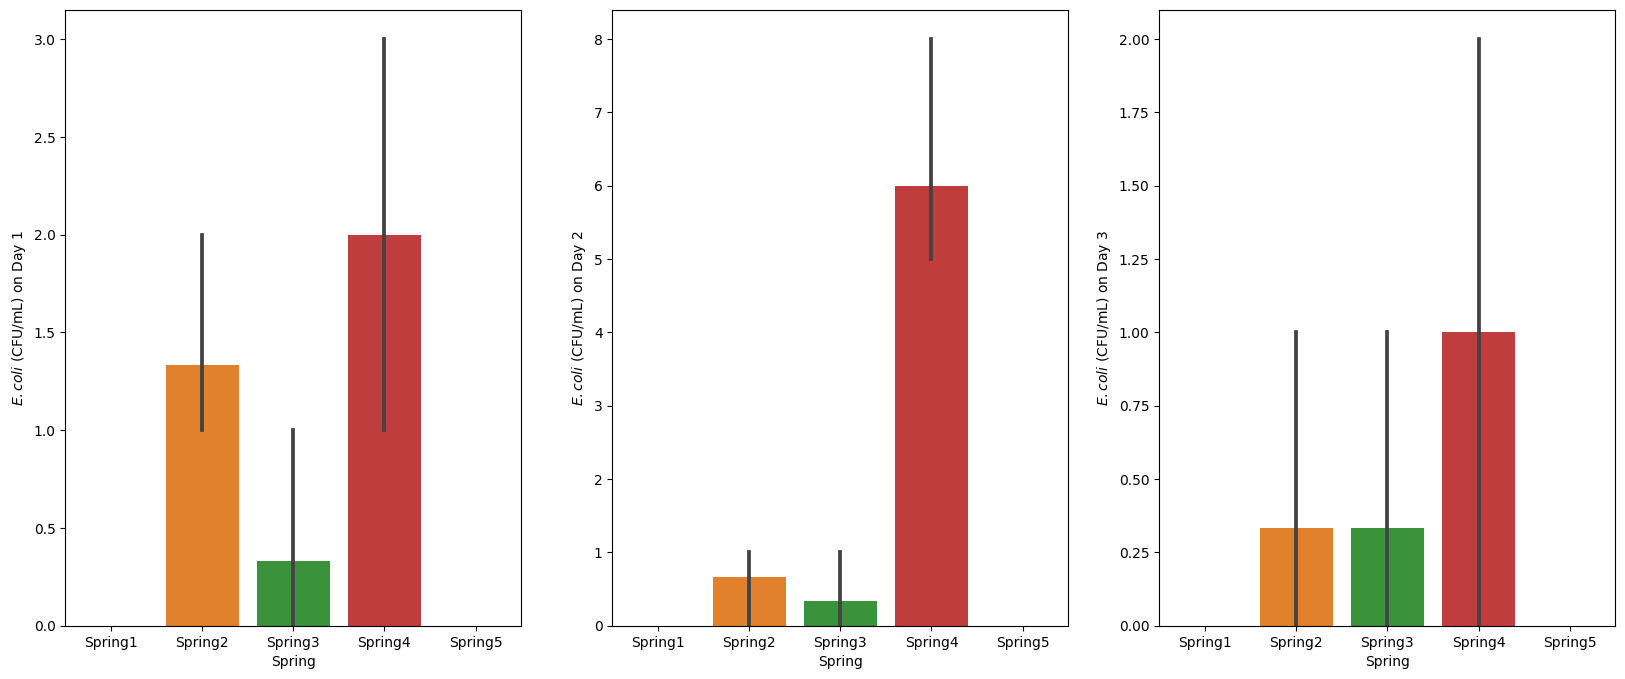

In [94]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
plt.subplot(1,3,1)
# fig, ax1 = pyplot.subplots(figsize = (10,10))
sns.barplot(x = 'Spring', y = 'D1_ecoli', data = dayta_1)
plt.ylabel('$\itE. coli$ (CFU/mL) on Day 1')

plt.subplot(1,3,2)
# fig, ax1 = pyplot.subplots(figsize = (10,10))
sns.barplot(x = 'Spring', y = 'D2_ecoli', data = dayta_2)
plt.ylabel('$\itE. coli$ (CFU/mL) on Day 2')


plt.subplot(1,3,3)
# fig, ax1 = pyplot.subplots(figsize = (10,10))
sns.barplot(x = 'Spring', y = 'D3_ecoli', data = dayta_3)
plt.ylabel('$\itE. coli$ (CFU/mL) on Day 3')
# plt.tight_layout()
plt.show()

####**Data shows Spring 4 had the most E-coli**






##**Data Visualization for Coliforms**




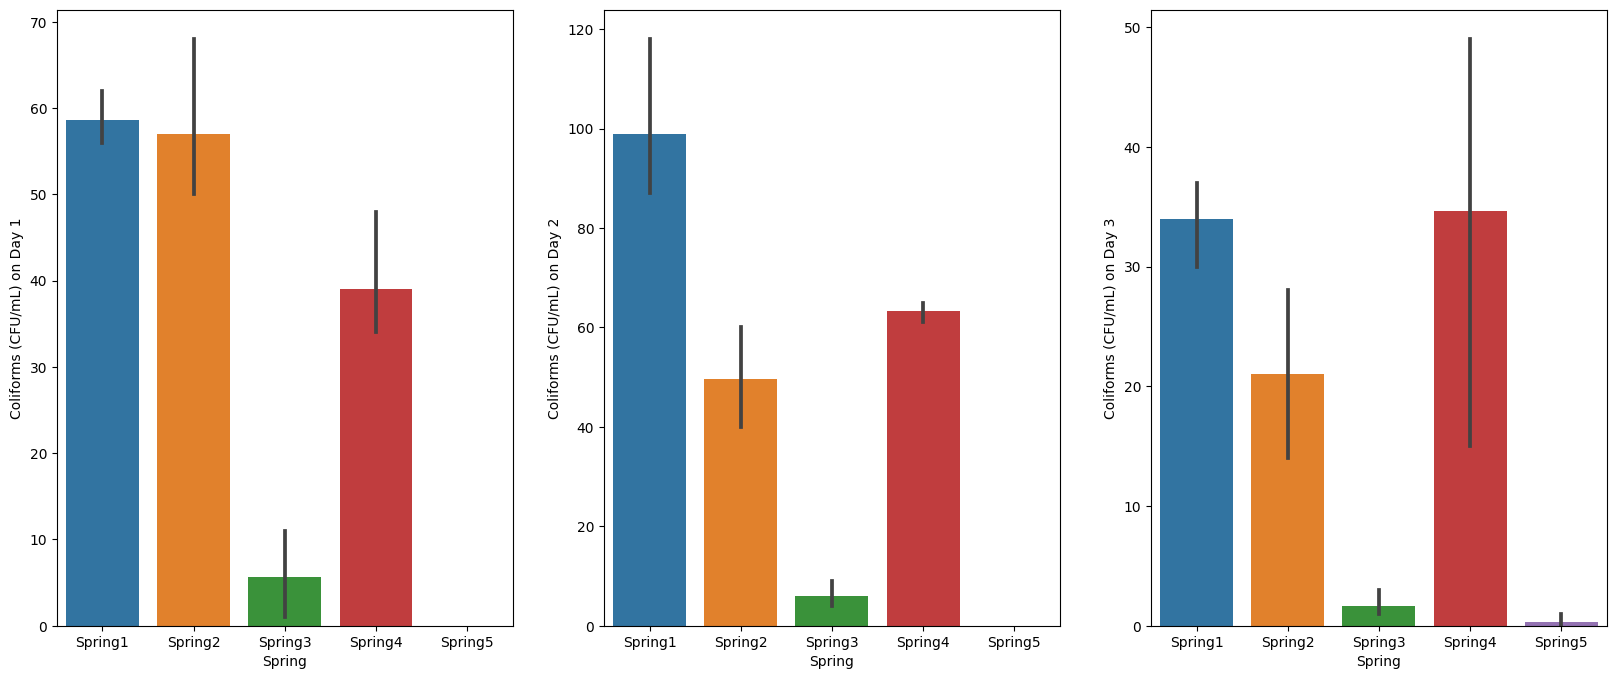

In [95]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
plt.subplot(1,3,1)
# fig, ax1 = pyplot.subplots(figsize = (10,10))
sns.barplot(x = 'Spring', y = 'D1_coliforms', data = dayta_1)
plt.ylabel('Coliforms (CFU/mL) on Day 1')

plt.subplot(1,3,2)
# fig, ax1 = pyplot.subplots(figsize = (10,10))
sns.barplot(x = 'Spring', y = 'D2_coliforms', data = dayta_2)
plt.ylabel('Coliforms (CFU/mL) on Day 2')


plt.subplot(1,3,3)
# fig, ax1 = pyplot.subplots(figsize = (10,10))
sns.barplot(x = 'Spring', y = 'D3_coliforms', data = dayta_3)
plt.ylabel('Coliforms (CFU/mL) on Day 3')
# plt.tight_layout()
plt.show()



####**Data shows Spring 3 had the least Coliforms**





##**Total of average of E-coli and Coliforms**




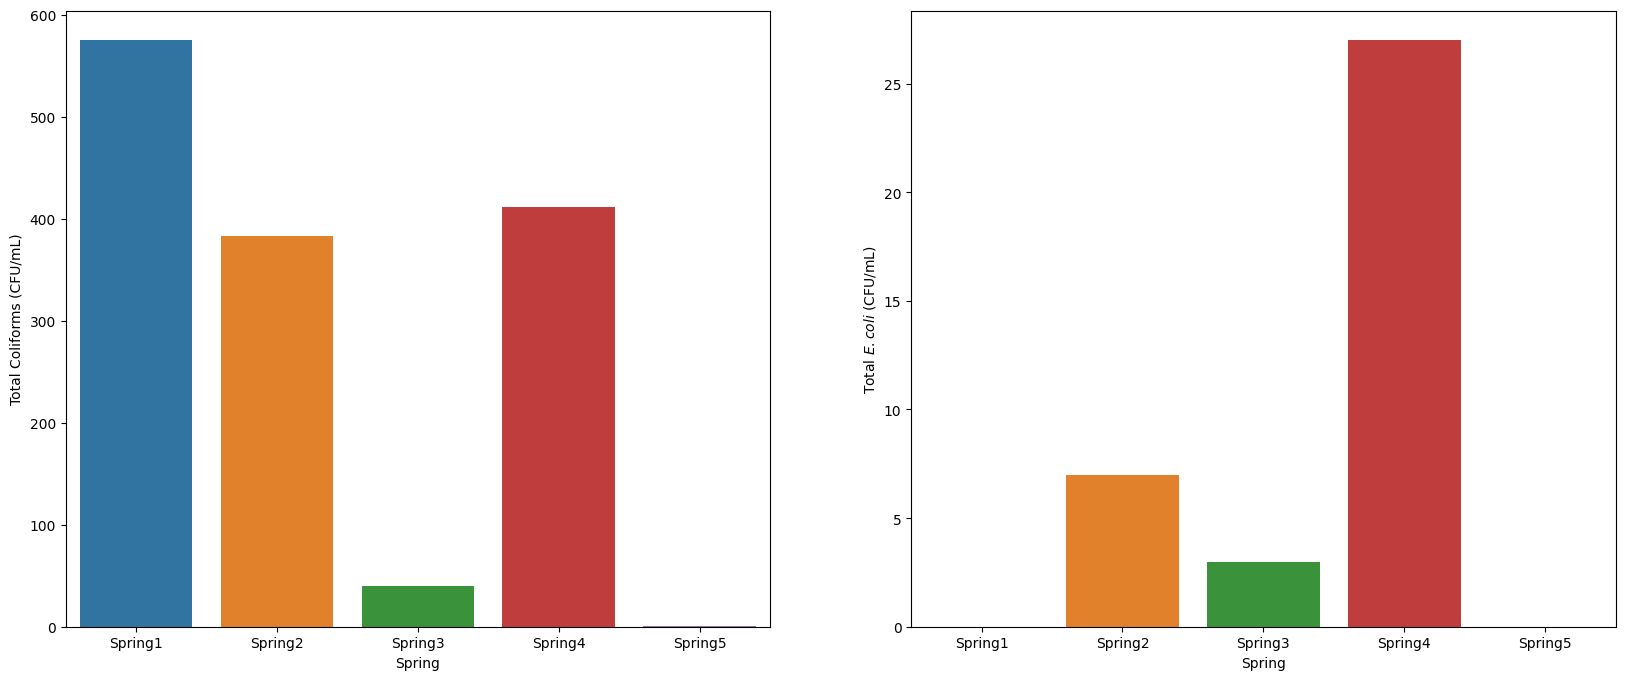

In [96]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
plt.subplot(1,2,2)
# fig, ax1 = pyplot.subplots(figsize = (10,10))
sns.barplot(x = 'Spring', y = 'total_ecoli', data = data2)
plt.ylabel('Total $\itE. coli$ (CFU/mL)')


plt.subplot(1,2,1)
# fig, ax1 = pyplot.subplots(figsize = (10,10))
sns.barplot(x = 'Spring', y = 'total_coliforms', data = data2)
plt.ylabel('Total Coliforms (CFU/mL)')
plt.show()



##**Data Visualization for Visitors**




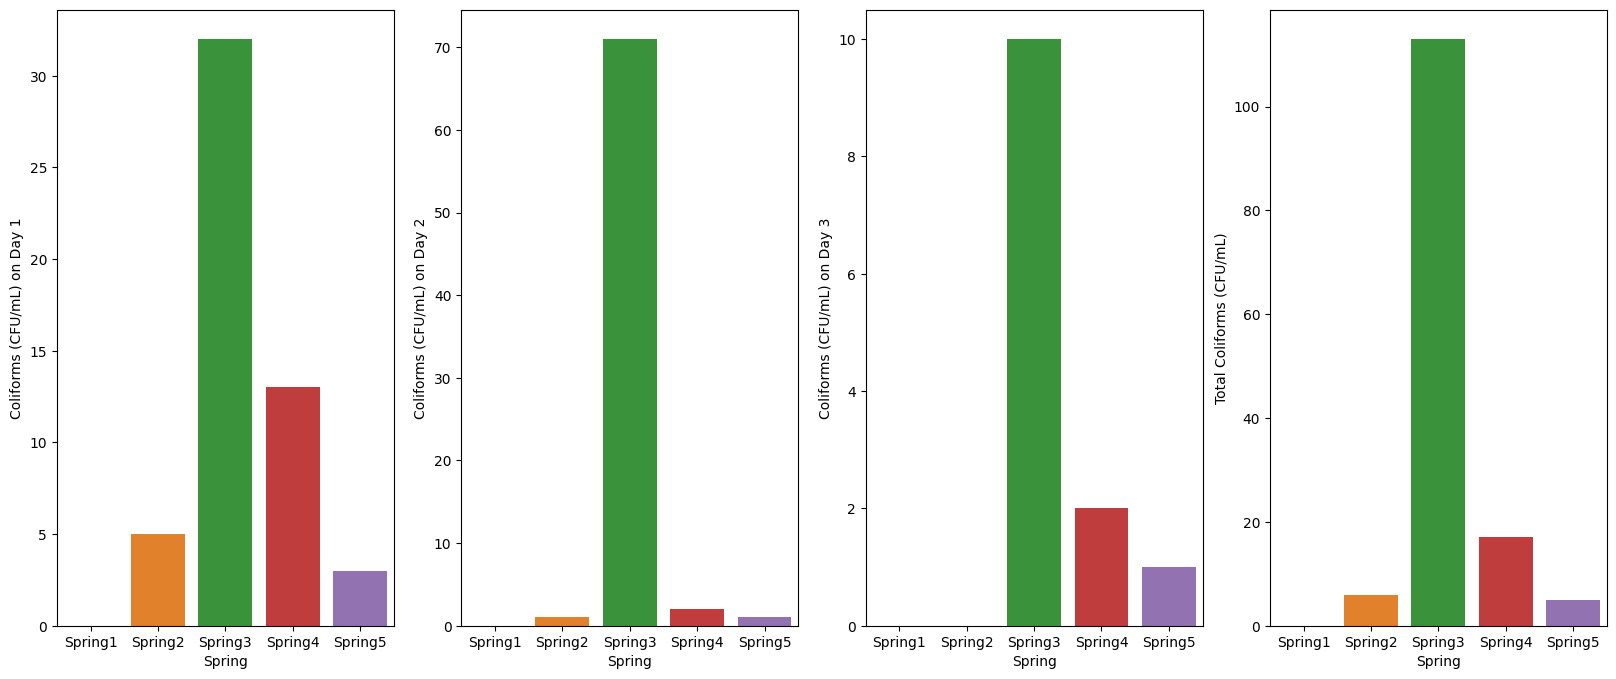

In [97]:
fig, (ax1) = plt.subplots(1,4, figsize = (20,8))
plt.subplot(1,4,1)
# fig, ax1 = pyplot.subplots(figsize = (10,10))
sns.barplot(x = 'Spring', y = 'D1_visitors', data = dayta_1)
plt.ylabel('Coliforms (CFU/mL) on Day 1')

plt.subplot(1,4,2)
# fig, ax1 = pyplot.subplots(figsize = (10,10))
sns.barplot(x = 'Spring', y = 'D2_visitors', data = dayta_2)
plt.ylabel('Coliforms (CFU/mL) on Day 2')

plt.subplot(1,4,3)
# fig, ax1 = pyplot.subplots(figsize = (10,10))
sns.barplot(x = 'Spring', y = 'D3_visitors', data = dayta_3)
plt.ylabel('Coliforms (CFU/mL) on Day 3')
# plt.tight_layout()

plt.subplot(1,4,4)
# fig, ax1 = pyplot.subplots(figsize = (10,10))
sns.barplot(x = 'Spring', y = 'total_visitors', data = data2)
plt.ylabel('Total Coliforms (CFU/mL)')
# plt.tight_layout()
plt.show()




####**Data shows Spring 3 had the most visitors**






##**Data Visualization for Average Water Temperature (3 days)**




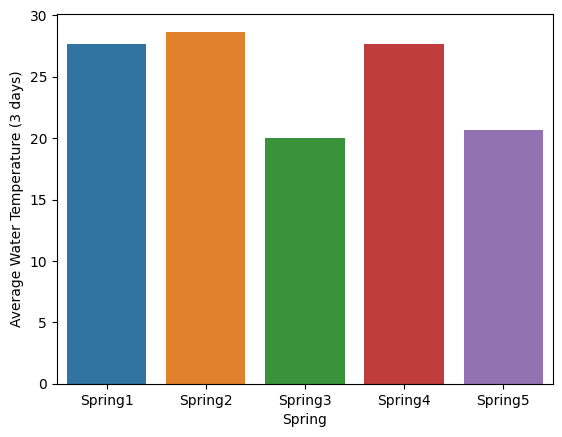

In [62]:
sns.barplot(x = 'Spring', y = 'average_waterTemp', data = data2)
plt.ylabel('Average Water Temperature (3 days)')
plt.xlabel('Spring')
# plt.tight_layout()
plt.show()



##**Pearson Correlation Matrix**




# Read the Pearson Correlation Matrix below similar to a multiplication table


1.   ### **A Pearson r of 1 can be observed diagonally, this is because a variable is perfectly correlated to itself**
2.   ### **A Pearson r value of 1 means perfect correlation while 0 means no correlation**
3. ### **A negative Pearson r value means the 2 variables are indirectly proportional**

#**Weak positive correlation would be in the range of 0.1 to 0.3, moderate positive correlation from 0.3 to 0.5, and strong positive correlation from 0.5 to 1.0**



In [63]:
data2.columns

Index(['Spring', 'D1_ecoli', 'D1_coliforms', 'D1_visitors', 'D1_weather',
       'D1_waterTemp', 'D1_rain', 'D2_ecoli', 'D2_coliforms', 'D2_visitors',
       'D2_weather', 'D2_waterTemp', 'D2_rain', 'D3_ecoli', 'D3_coliforms',
       'D3_visitors', 'D3_weather', 'D3_waterTemp', 'D3_rain', 'total_ecoli',
       'total_coliforms', 'total_visitors', 'average_waterTemp', 'total_rain'],
      dtype='object')

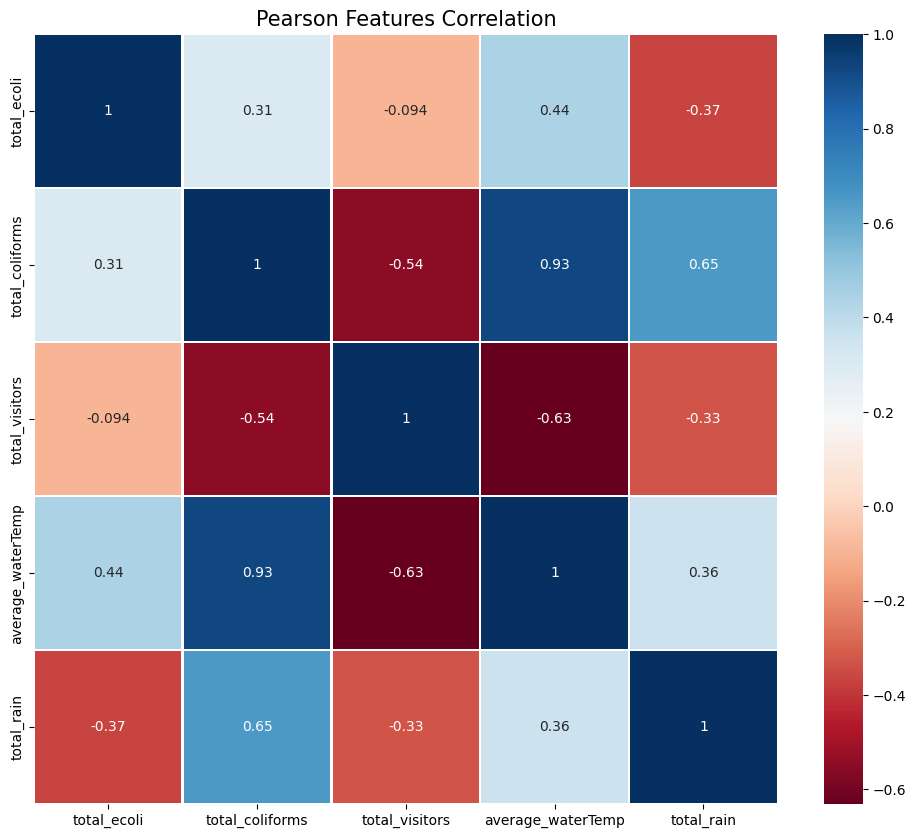

In [64]:
cmap = plt.cm.RdBu
corr = data2[['total_ecoli', 'total_coliforms', 'total_visitors', 'average_waterTemp', 'total_rain']].corr()
plt.figure(figsize=(12,10))
plt.title('Pearson Features Correlation', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)



##**Spearman Rho Features Correlation Matrix**





###**Correlation coefficients between .10 and .29 represent a small association, coefficients between .30 and .49 represent a medium association, and coefficients of .50 and above represent a large association or relationship.**

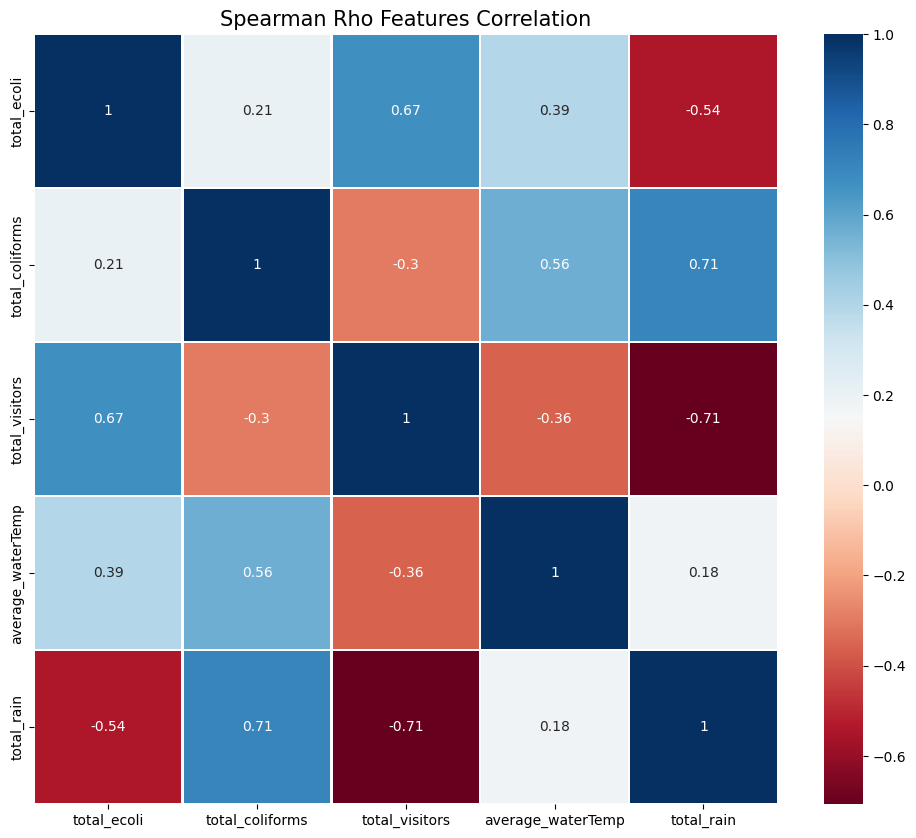

In [65]:
cmap = plt.cm.RdBu
corr = data2[['total_ecoli', 'total_coliforms', 'total_visitors', 'average_waterTemp', 'total_rain']].corr(method = 'spearman')
plt.figure(figsize=(12,10))
plt.title('Spearman Rho Features Correlation', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)



##**Weather, E-Coli, and Coliforms**





Text(0.5, 0, 'Spring, Coliforms (CFU/mL)')

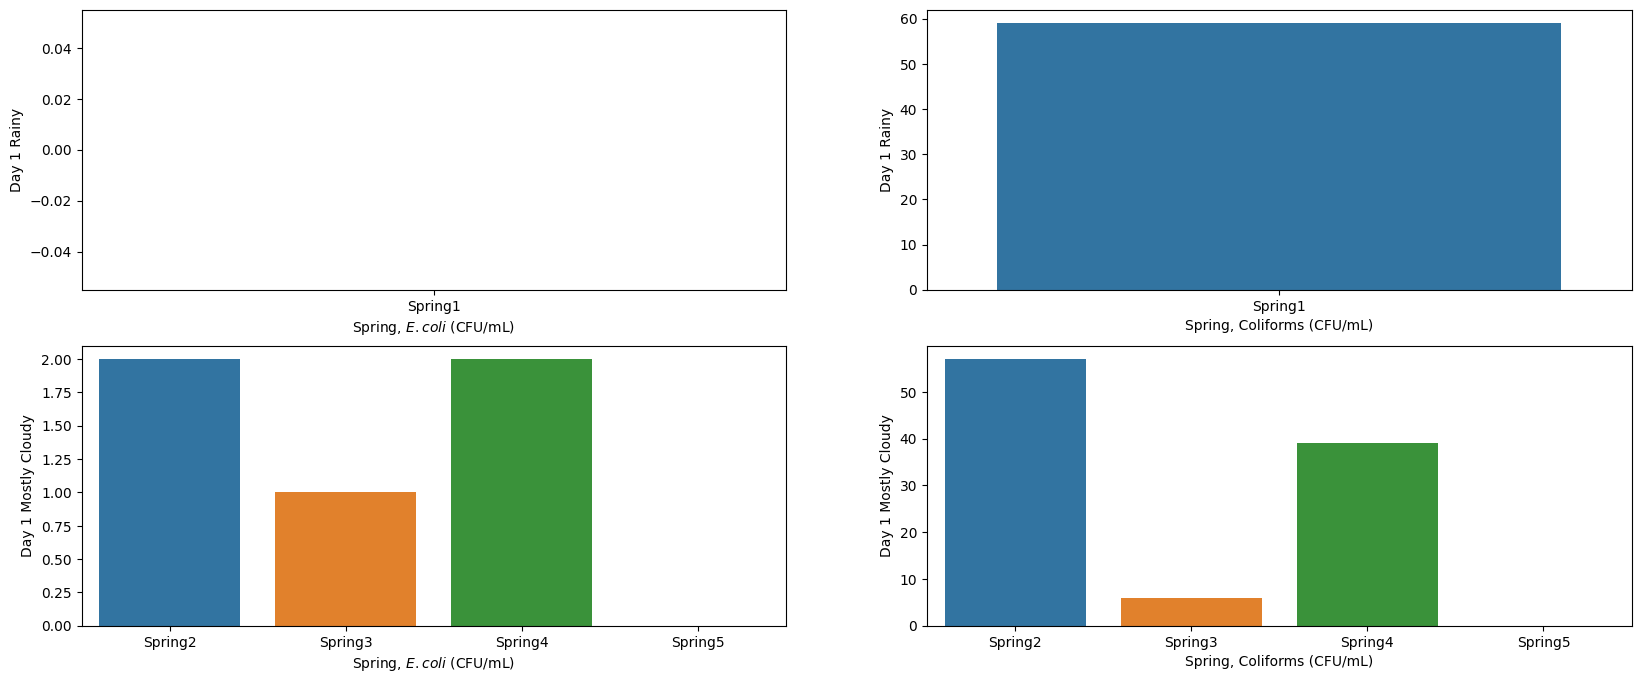

In [101]:
fig, (ax1) = plt.subplots(1,4, figsize = (20,8))
plt.subplot(2,2,1)
data_rain1 = data2.loc[data2['D1_weather'] == 1]
sns.barplot(x = 'Spring', y = 'D1_ecoli', data = data_rain1)
plt.ylabel('Day 1 Rainy')
plt.xlabel('Spring, $\itE. coli$ (CFU/mL)')


plt.subplot(2,2,2)
sns.barplot(x = 'Spring', y = 'D1_coliforms', data = data_rain1)
plt.ylabel('Day 1 Rainy')
plt.xlabel('Spring, Coliforms (CFU/mL)')

plt.subplot(2,2,3)
data_rain2 = data2.loc[data2['D1_weather'] == 3]
sns.barplot(x = 'Spring', y = 'D1_ecoli', data = data_rain2)
plt.ylabel('Day 1 Mostly Cloudy')
plt.xlabel('Spring, $\itE. coli$ (CFU/mL)')


plt.subplot(2,2,4)
sns.barplot(x = 'Spring', y = 'D1_coliforms', data = data_rain2)
plt.ylabel('Day 1 Mostly Cloudy')
plt.xlabel('Spring, Coliforms (CFU/mL)')



Text(0.5, 0, 'Spring, Coliforms (CFU/mL)')

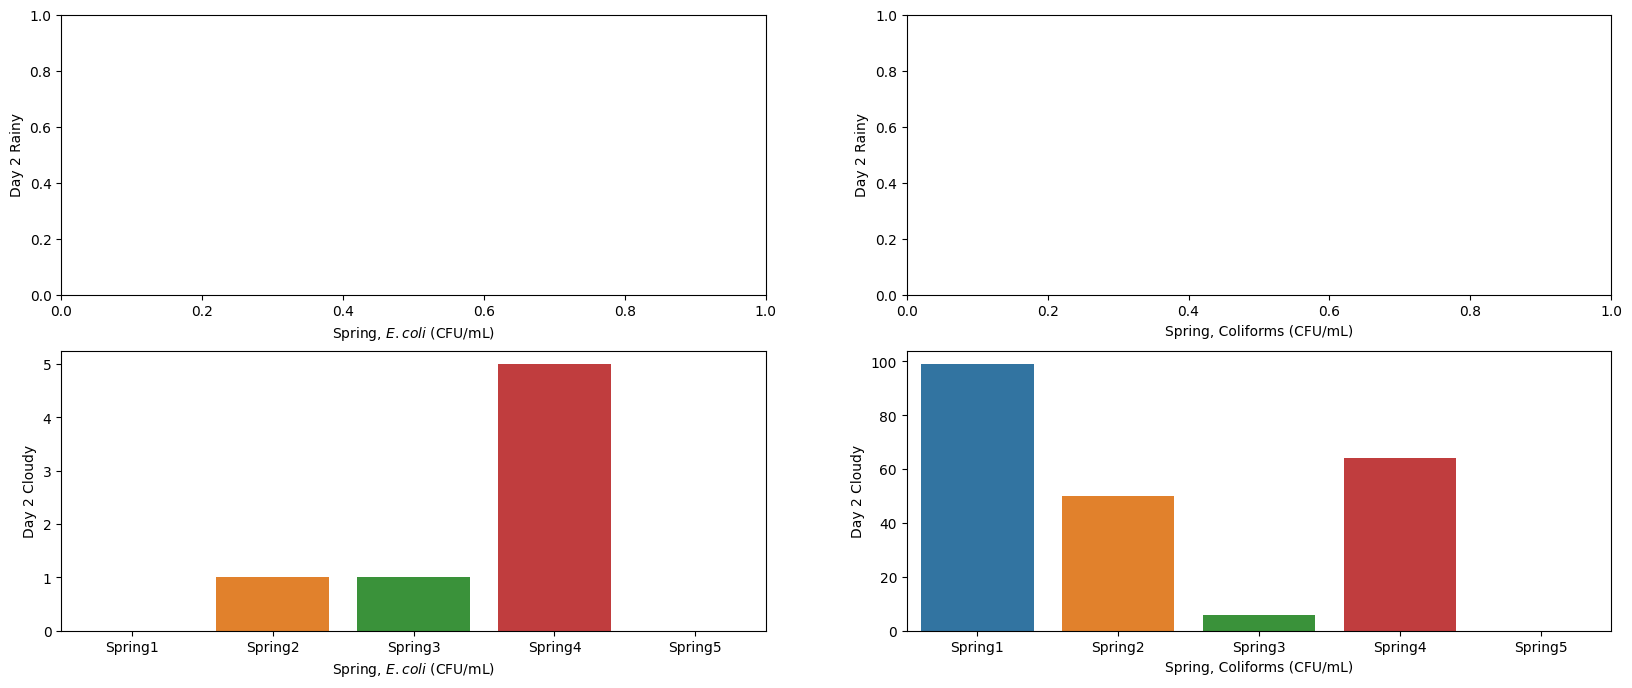

In [100]:
fig, (ax1) = plt.subplots(1,4, figsize = (20,8))
plt.subplot(2,2,1)
# data_rain3 = data2.loc[data2['D2_weather'] == 1]
# sns.barplot(x = 'Spring', y = 'total_ecoli', data = data_rain3)
plt.ylabel('Day 2 Rainy')
plt.xlabel('Spring, $\itE. coli$ (CFU/mL)')


plt.subplot(2,2,2)
# sns.barplot(x = 'Spring', y = 'total_coliforms', data = data_rain3)
plt.ylabel('Day 2 Rainy')
plt.xlabel('Spring, Coliforms (CFU/mL)')

plt.subplot(2,2,3)
data_rain4 = data2.loc[data2['D2_weather'] == 2]
sns.barplot(x = 'Spring', y = 'D2_ecoli', data = data_rain4)
plt.ylabel('Day 2 Cloudy')
plt.xlabel('Spring, $\itE. coli$ (CFU/mL)')


plt.subplot(2,2,4)
sns.barplot(x = 'Spring', y = 'D2_coliforms', data = data_rain4)
plt.ylabel('Day 2 Cloudy')
plt.xlabel('Spring, Coliforms (CFU/mL)')



Text(0.5, 0, 'Spring, Coliforms (CFU/mL)')

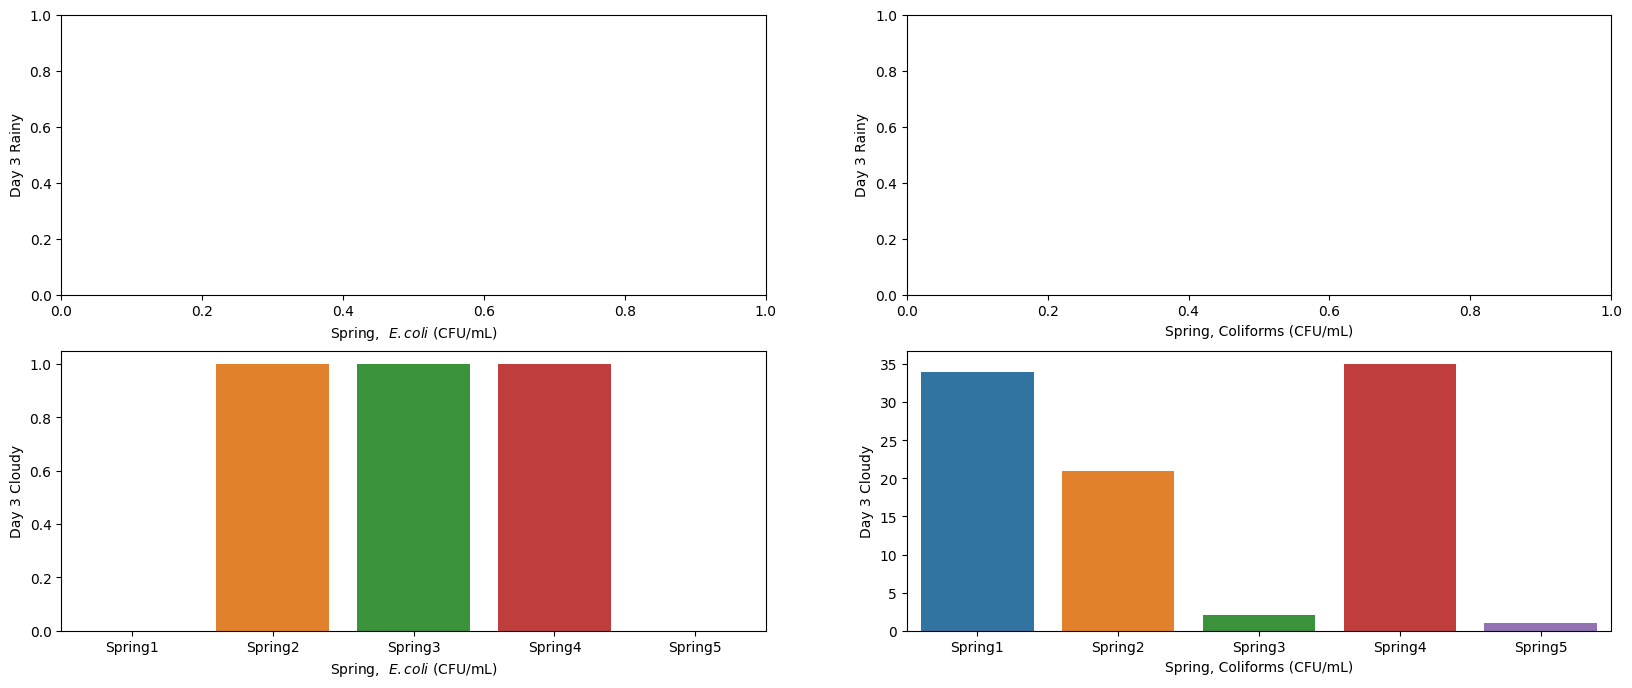

In [103]:
fig, (ax1) = plt.subplots(1,4, figsize = (20,8))
plt.subplot(2,2,1)
# data_rain5 = data2.loc[data2['D3_weather'] == 1]
# sns.barplot(x = 'Spring', y = 'total_ecoli', data = data_rain3)
plt.ylabel('Day 3 Rainy')
plt.xlabel('Spring,  $\itE. coli$ (CFU/mL)')


plt.subplot(2,2,2)
# sns.barplot(x = 'Spring', y = 'total_coliforms', data = data_rain3)
plt.ylabel('Day 3 Rainy')
plt.xlabel('Spring, Coliforms (CFU/mL)')

plt.subplot(2,2,3)
data_rain6 = data2.loc[data2['D3_weather'] == 2]
sns.barplot(x = 'Spring', y = 'D3_ecoli', data = data_rain6)
plt.ylabel('Day 3 Cloudy')
plt.xlabel('Spring,  $\itE. coli$ (CFU/mL)')


plt.subplot(2,2,4)
sns.barplot(x = 'Spring', y = 'D3_coliforms', data = data_rain6)
plt.ylabel('Day 3 Cloudy')
plt.xlabel('Spring, Coliforms (CFU/mL)')